# <center>Click_prediction_small dataset</center> 

<h2>Dataset Description:</h2>
    
The data is about the advertisements that appear next to search results in a search engine and whether or not users click on them. 
The goal is to create the most precise model to forecast whether a person would click on a specific advertisement. A search session includes data on the user's ID, the query they entered, the ads that were shown to them, and a target feature that shows if they clicked at least one of the ads during this session. "Depth" refers to the quantity of advertisements shown to a user during a session. Position refers to ad's placement in the list that is being displayed. A short sentence called "title," a little longer phrase called "description," and a URL called "display URL" are used to display an advertisement.
Each session was divided into many instances to create the dataset. Each instance describes an advertisement seen in a certain setting (such as "depth" or "position"). Similar user, ad, query, and setting instance instances are combined. Additional properties for each user and each ad are kept in separate data files and may be sought up using the instance ids.

<h2>Columns Description:</h2>
<ul> 
<li>Click – binary variable indicating whether a user clicked on at least one ad.</li>
<li>Impression - the number of search sessions in which AdID was impressed by UserID who issued Query.</li>
<li>Url_hash - URL is hashed for anonymity</li>
<li>AdID</li>
<li>AdvertiserID - some advertisers consistently optimize their ads, so the title and description of their ads are more attractive than those of others’ ads.</li>
<li>Depth - number of ads displayed to a user in a session</li>
<li>Position - order of an ad in the displayed list</li>
<li>QueryID - is the key of the data file 'queryid_tokensid.txt'. (follow the link to the original KDD Cup page, track 2)
<li>KeywordID - is the key of 'purchasedkeyword_tokensid.txt' (follow the link to the original KDD Cup page, track 2)
<li>TitleID - is the key of 'titleid_tokensid.txt'
<li>DescriptionID - is the key of 'descriptionid_tokensid.txt' (follow the link to the original KDD Cup page, track 2)
<li>UserID – is also the key of 'userid_profile.txt' (follow the link to the original KDD Cup page, track 2). 0 is a special value denoting that the user could be identified</li>
</ul>

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.metrics import accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import ADASYN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.under_sampling import NearMiss
from sklearn.cluster import KMeans
from sklearn.model_selection import learning_curve
from mlxtend.evaluate import bias_variance_decomp


In [2]:
#reading the dataset
df = pd.read_csv("phpfGCaQC.csv")
df

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
0,0,1,1.071003e+19,8343295,11700,3,3,7702266,21264,27892,1559,0
1,1,1,1.736385e+19,20017077,23798,1,1,93079,35498,4,36476,562934
2,0,1,8.915473e+18,21348354,36654,1,1,10981,19975,36105,33292,11621116
3,0,1,4.426693e+18,20366086,33280,3,3,0,5942,4057,4390,8778348
4,0,1,1.157260e+19,6803526,10790,2,1,9881978,60593,25242,1679,12118311
...,...,...,...,...,...,...,...,...,...,...,...,...
39943,0,1,3.593550e+18,21898643,37867,2,1,12825939,1091,1657,1914,0
39944,0,1,1.760828e+19,20575578,8873,2,1,11699,8338,7866,9210,19487
39945,0,5,9.613260e+18,21183848,18716,2,1,243826,9594,8881,13277,2305
39946,0,1,9.750423e+18,21222438,35880,3,3,7130804,13078,943122,1436,0


In [3]:
df.shape 

(39948, 12)

In [4]:
df.dtypes

click               int64
impression          int64
url_hash          float64
ad_id               int64
advertiser_id       int64
depth               int64
position            int64
query_id            int64
keyword_id          int64
title_id            int64
description_id      int64
user_id             int64
dtype: object

In [5]:
#Getting the percentage of missing values in each column  
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percent_missing': percent_missing})
missing_value_df

,Percent_missing
click,0.0
impression,0.0
url_hash,0.0
ad_id,0.0
advertiser_id,0.0
depth,0.0
position,0.0
query_id,0.0
keyword_id,0.0
title_id,0.0


In [6]:
#getting duplicates 
df.duplicated().sum()

22

In [7]:
#dropping duplicates
df.drop_duplicates(keep= 'first' , inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
#getting the sape 
df.shape

(39926, 12)

In [10]:
#getting the describe 
df.describe()

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
count,39926.000000,39926.000000,3.992600e+04,3.992600e+04,39926.000000,39926.000000,39926.000000,3.992600e+04,3.992600e+04,3.992600e+04,3.992600e+04,3.992600e+04
mean,0.168437,2.100686,9.640626e+18,1.601518e+07,22455.388569,1.959951,1.463808,3.142296e+06,3.520282e+04,1.733220e+05,1.112000e+05,3.669698e+06
std,0.374258,65.885522,4.986421e+18,7.222941e+06,11796.256172,0.715356,0.631489,5.841841e+06,1.009373e+05,4.657715e+05,3.284561e+05,5.492109e+06
min,0.000000,1.000000,4.824369e+14,1.000515e+06,82.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,5.468728e+18,9.027238e+06,13455.500000,1.000000,1.000000,2.365750e+03,3.700000e+02,6.710000e+02,3.560000e+02,1.479000e+03
50%,0.000000,1.000000,1.034947e+19,2.030327e+07,23808.000000,2.000000,1.000000,1.126520e+05,3.387500e+03,1.065400e+04,5.050000e+03,8.884700e+05
75%,0.000000,1.000000,1.434039e+19,2.116392e+07,32124.750000,2.000000,2.000000,3.148034e+06,2.103000e+04,1.003075e+05,5.294600e+04,5.128694e+06
max,1.000000,11820.000000,1.844094e+19,2.222734e+07,39074.000000,3.000000,3.000000,2.624010e+07,1.243163e+06,4.050208e+06,3.171504e+06,2.390734e+07


<h2>Data Visualization:

[]

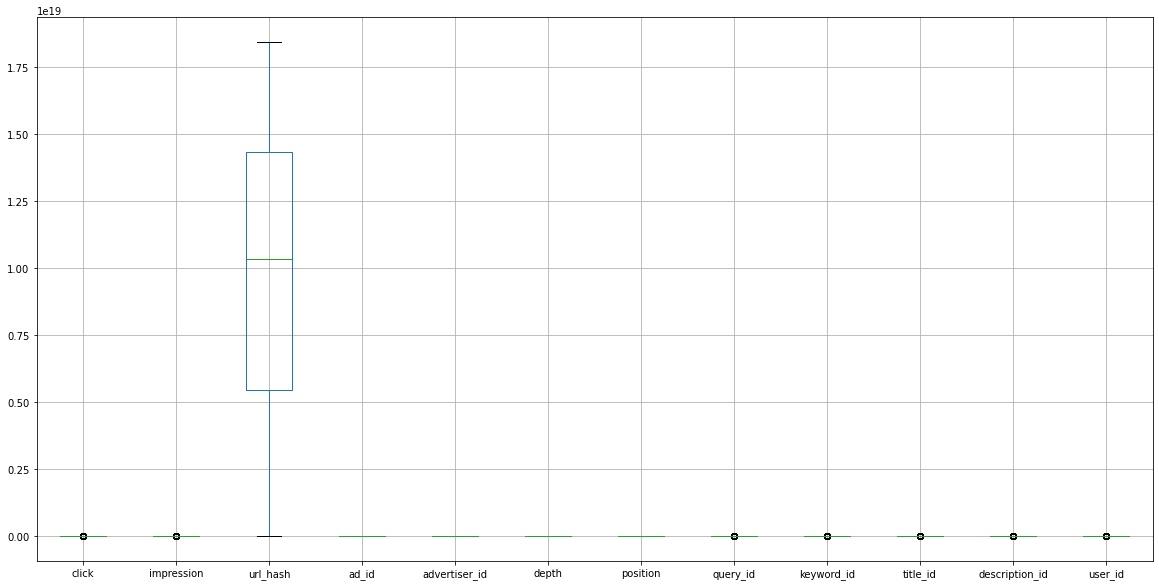

In [11]:
#Outliers
df.boxplot(return_type='dict',figsize=(20, 10))
plt.plot()

array([[<AxesSubplot:title={'center':'click'}>,
        <AxesSubplot:title={'center':'impression'}>,
        <AxesSubplot:title={'center':'url_hash'}>],
       [<AxesSubplot:title={'center':'ad_id'}>,
        <AxesSubplot:title={'center':'advertiser_id'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'position'}>,
        <AxesSubplot:title={'center':'query_id'}>,
        <AxesSubplot:title={'center':'keyword_id'}>],
       [<AxesSubplot:title={'center':'title_id'}>,
        <AxesSubplot:title={'center':'description_id'}>,
        <AxesSubplot:title={'center':'user_id'}>]], dtype=object)

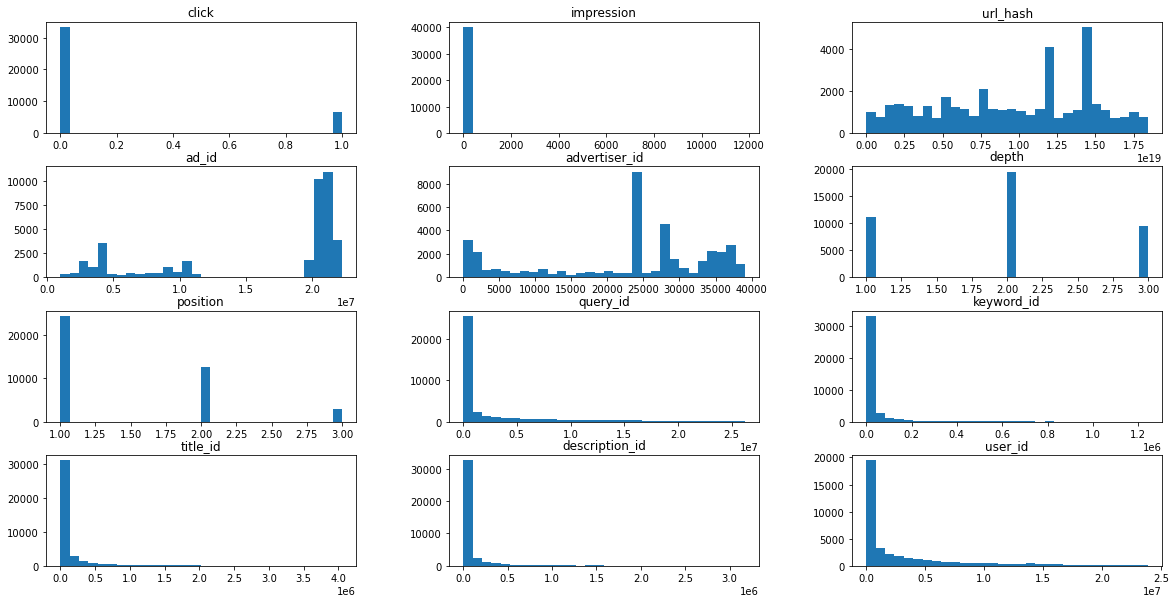

In [12]:
# Visualization data distrbution 
df.hist(figsize=(20,10), grid=False, bins = 30)

The data distribution is very skewed  

<AxesSubplot:>

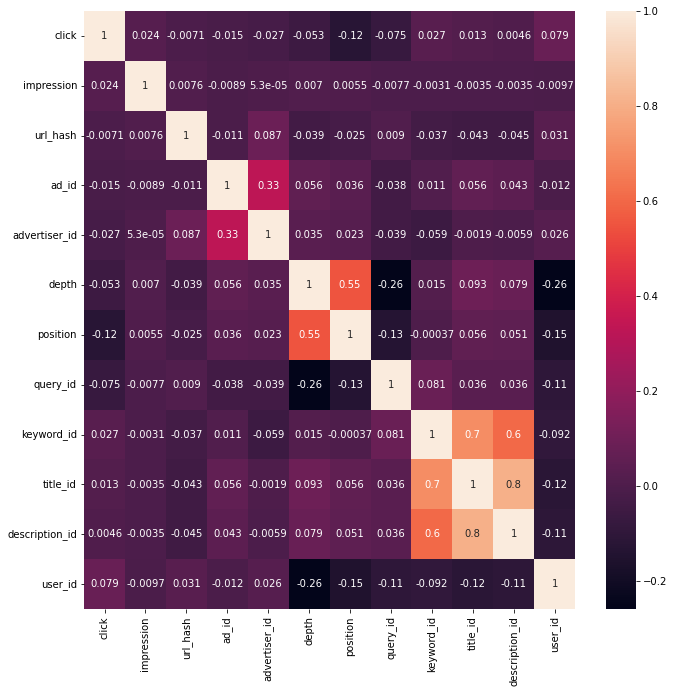

In [13]:
#Data Correlation, the data with high correlation are the depth with position,description_id and keyword_id, title_id and description_id 
corrmat = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

In [14]:
#checking data imbalance 
df.click.value_counts()

0    33201
1     6725
Name: click, dtype: int64

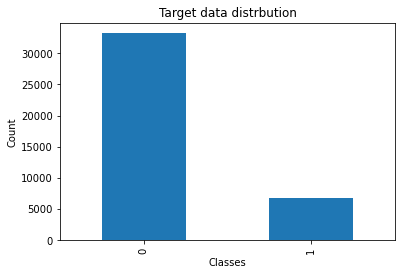

In [15]:
#visualizing the class distribution
df['click'].value_counts().plot(kind = 'bar', xlabel = 'Classes', ylabel = 'Count', title = 'Target data distrbution')
plt.show()

The data is very badly distributed imbalanced data as the 0 class has 33201 instances and the class 1 has 6725 instances

<h2>Outlier handling using IsolationForest:

In [16]:
#outlier detection 
outlierDetector =  IsolationForest(n_estimators=100,random_state = 42)
result = outlierDetector.fit_predict(df)

In [17]:
Outliers = df[result==-1]
print("Number of detected outliers is " +str(len(Outliers)))

Number of detected outliers is 7668


In [18]:
Outliers

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
0,0,1,1.071003e+19,8343295,11700,3,3,7702266,21264,27892,1559,0
10,0,1,1.154854e+19,21188630,17432,3,3,54485,20526,680977,621442,329865
11,1,3,1.205788e+19,20170434,27961,1,1,16554377,63355,106189,100521,1378623
17,0,1,1.493529e+19,21967731,37465,3,3,743855,64605,774277,125,0
19,0,2,6.715049e+18,3065545,23783,1,1,1060,60,54,78,22485516
...,...,...,...,...,...,...,...,...,...,...,...,...
39932,0,2,9.929190e+18,21400891,1870,2,1,3339839,177320,637607,533292,1123376
39935,1,1,7.903915e+18,21162257,1325,1,1,119,34,684,36,21225498
39939,0,1,1.544609e+19,21098737,7073,1,1,105129,10273,76575,193603,22657879
39941,0,1,1.146304e+19,21250008,35364,2,2,879683,647353,3956650,2788319,8276


In [19]:
#dropping the outliers
df.drop(Outliers.index, axis = 0, inplace = True)

In [20]:
df.shape

(32258, 12)

<h2>Data splitting 

In [21]:
#splitting the data to target and features 
Y = df['click']
X = df.drop('click', axis =1 )

In [22]:
#splitting the data to train and test 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
X

,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
1,1,1.736385e+19,20017077,23798,1,1,93079,35498,4,36476,562934
2,1,8.915473e+18,21348354,36654,1,1,10981,19975,36105,33292,11621116
3,1,4.426693e+18,20366086,33280,3,3,0,5942,4057,4390,8778348
4,1,1.157260e+19,6803526,10790,2,1,9881978,60593,25242,1679,12118311
5,1,2.827577e+17,21186478,35793,2,1,163315,4871,3257,1153,2886008
...,...,...,...,...,...,...,...,...,...,...,...
39942,1,1.768833e+19,20382992,17403,2,2,11881210,92,1314,1673,72733
39943,1,3.593550e+18,21898643,37867,2,1,12825939,1091,1657,1914,0
39944,1,1.760828e+19,20575578,8873,2,1,11699,8338,7866,9210,19487
39945,5,9.613260e+18,21183848,18716,2,1,243826,9594,8881,13277,2305


In [24]:
Y

1        1
2        0
3        0
4        0
5        1
        ..
39942    0
39943    0
39944    0
39945    0
39947    0
Name: click, Length: 32258, dtype: int64

<h2>Data Normalization

In [25]:
#Normalizing the data 
St = StandardScaler()
x_train = St.fit_transform(x_train)
x_test = St.transform(x_test)

In [26]:
#function for the learning curve plotting 
def LearningCurve(model,X, Y):
    train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(model, X, Y,cv=5,
                    scoring='accuracy',n_jobs=-1)
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
    ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
    ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
    ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
    ax.set_xlabel('Data Range')
    ax.set_ylabel('Accuracy')
    ax.set_title('Learning Curve')
    plt.show()

<h2>Handling imbalanced</h2>

<h3>Random oversampling

In [27]:
#applying the RandomOverSampler on the X and Y and fitting it 
overSampler = RandomOverSampler(random_state=42)
overX1,overY1=overSampler.fit_resample(X, Y)

In [28]:
#checking the value_clount of the target column after applying the Random OverSampling
pd.DataFrame(overY1,columns=['click'])['click'].value_counts()

1    28497
0    28497
Name: click, dtype: int64

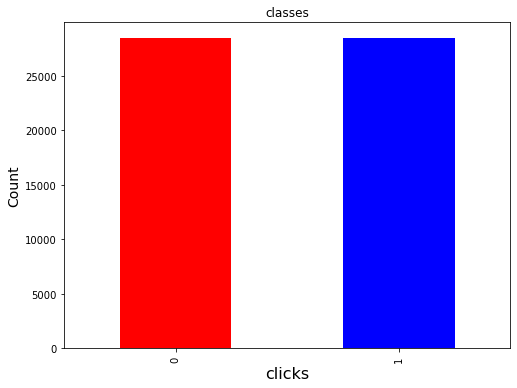

In [29]:
#bar plot for the classes after applying Random oversampling for handling the data imbalance 
ax=pd.DataFrame(overY1,columns=['click'])['click'].value_counts().plot(kind='bar',color=['red','blue'],
                                          title='classes',figsize=(8, 6))

plt.xticks(range(2),['0', '1'])
ax.set_xlabel("clicks",fontsize=16)
ax.set_ylabel("Count",fontsize=14)
plt.show()

In [30]:
#splitting the data again after the Random OverSampling to apply the RandomForest Classifier and checking the accuracy
x_train2, x_test2, y_train2, y_test2 = train_test_split(overX1, overY1, test_size=0.3,random_state=42)
x_train2 = St.fit_transform(x_train2)
x_test2 = St.fit_transform(x_test2)
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(x_train2, y_train2)
y_pred=rf.predict(x_test2)

In [31]:
#printing the accuracy of the RandomForest Classifier
print("ACC of model: %.4f After randm Oversampling" %accuracy_score(y_pred,y_test2))

ACC of model: 0.7551 After randm Oversampling


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


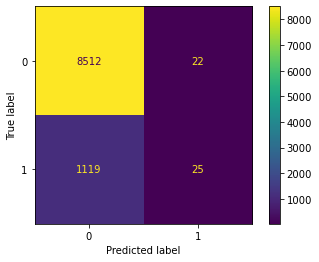

In [32]:
#plotting the confusion matrix
plot_confusion_matrix(rf,x_test,y_test)

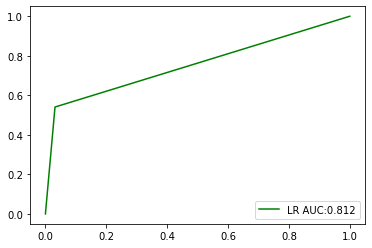

In [33]:
#plotting the ROC curve
auc = roc_auc_score(y_pred, y_test2)
fpr, tpr, thresholds = roc_curve(y_test2, y_pred)

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)
plt.legend(loc=4)

plt.show()

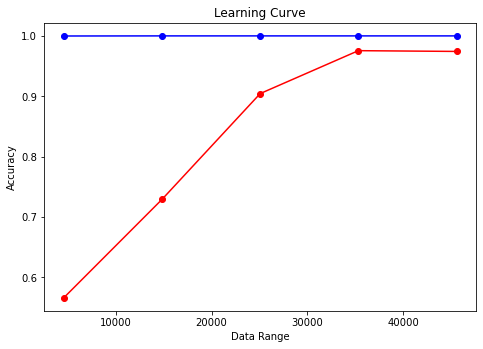

In [34]:
#learning curve of the RF
LearningCurve(rf, overX1,overY1)

In [66]:
mse, bias, var = bias_variance_decomp\
(rf, x_train2, y_train2.values, x_test2, y_test2.values, loss='mse', num_rounds=20, random_seed=42)

In [67]:
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.240
Bias: 0.209
Variance: 0.031


<h3>SMOTE

In [35]:
#copping the data to new variable 
df2 = df.copy()

In [36]:
#splitting the data into target and features
Y1 = df2['click']
X1 = df2.drop('click', axis =1 )

In [37]:
#applying the SMOTE on the X and Y and fitting it 
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_resample(X1, Y1)

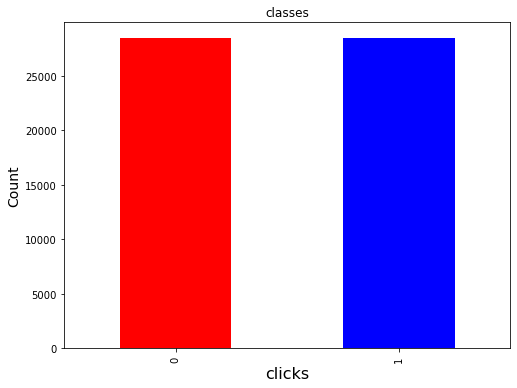

In [38]:
#bar plot for the classes after applying SMOTE for handling the data imbalance 
ax=pd.DataFrame(overY,columns=['click'])['click'].value_counts().plot(kind='bar',color=['red','blue'],
                                          title='classes',figsize=(8, 6))

plt.xticks(range(2),['0', '1'])
ax.set_xlabel("clicks",fontsize=16)
ax.set_ylabel("Count",fontsize=14)
plt.show()

In [39]:
#splitting the data again after the SMOTE to apply the RandomForest Classifier and checking the accuracy
x_train1, x_test1, y_train1, y_test1 = train_test_split(overX, overY, test_size=0.3,random_state=42)
x_train1 = St.fit_transform(x_train1)
x_test1 = St.fit_transform(x_test1)
rf1 = RandomForestClassifier(n_estimators = 100, random_state=42)
rf1.fit(x_train1, y_train1)
y_pred1=rf.predict(x_test1)

In [40]:
#printing the accuracy of the RandomForest Classifier
print("ACC of model: %.4f After SMOTE" %accuracy_score(y_pred1,y_test1))

ACC of model: 0.5548 After SMOTE


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


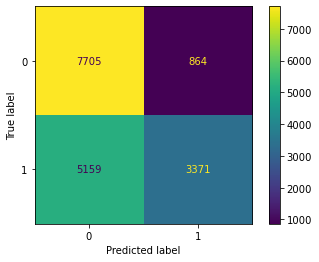

In [41]:
#plotting the confusion matrix
plot_confusion_matrix(rf1,x_test1,y_test1)

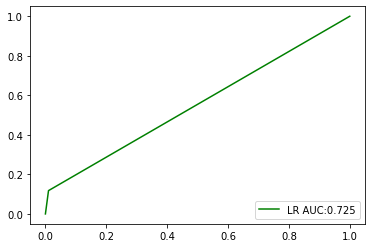

In [42]:
#plotting the ROC curve
auc = roc_auc_score(y_pred1, y_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)
plt.legend(loc=4)

plt.show()

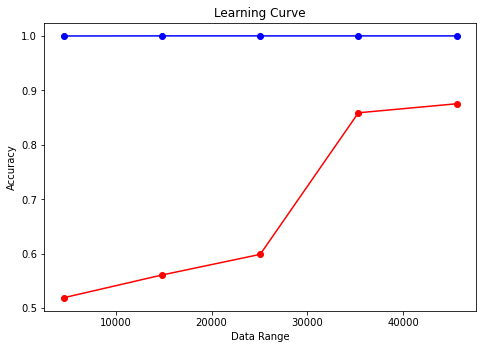

In [43]:
#learning curve of the RF
LearningCurve(rf1, overX,overY)

In [68]:
mse, bias, var = bias_variance_decomp\
(rf1, x_train1, y_train1.values, x_test1, y_test1.values, loss='mse', num_rounds=20, random_seed=42)

In [69]:
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.342
Bias: 0.307
Variance: 0.035


<h2>NearMiss Undersampling

In [52]:
#copping the data to new variable 
df3 = df.copy()

In [53]:
#splitting the data into target and features
Y2 = df3['click']
X2 = df3.drop('click', axis =1 )

In [54]:
#splitting the data into train and test
x_train3, x_test3, y_train3, y_test3 = train_test_split(X2, Y2, test_size=0.3, random_state=42)

In [55]:
#applying the NearMiss Undersampling on the X and Y and fitting it 
nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_resample(x_train3, y_train3.ravel())

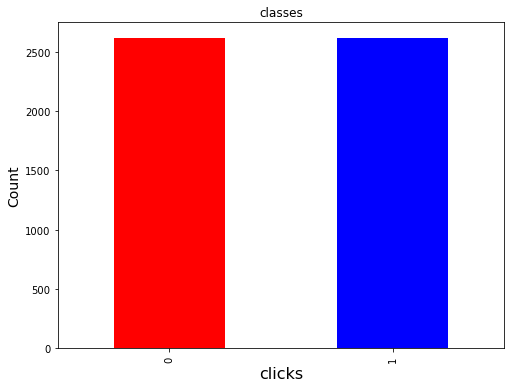

In [56]:
#bar plot for the classes after applying NearMiss Undersampling for handling the data imbalance 
ax=pd.DataFrame(y_train_miss,columns=['click'])['click'].value_counts().plot(kind='bar',color=['red','blue'],
                                          title='classes',figsize=(8, 6))

plt.xticks(range(2),['0', '1'])
ax.set_xlabel("clicks",fontsize=16)
ax.set_ylabel("Count",fontsize=14)
plt.show()

In [57]:
#splitting the data again after the NearMiss Undersampling to apply the RandomForest Classifier and checking the accuracy
x_train4, x_test4, y_train4, y_test4 = train_test_split(X_train_miss, y_train_miss, test_size=0.3,random_state=42)
x_train4 = St.fit_transform(x_train4)
x_test4 = St.fit_transform(x_test4)
rf2 = RandomForestClassifier(n_estimators = 100, random_state=42)
rf2.fit(x_train4, y_train4)
y_pred4=rf.predict(x_test4)

In [58]:
#printing the accuracy of the RandomForest Classifier
print("ACC of model: %.4f After NearMiss Undersampling" %accuracy_score(y_pred4,y_test4))

ACC of model: 0.5003 After NearMiss Undersampling


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


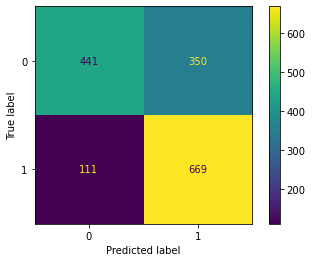

In [59]:
#plotting the confusion matrix
plot_confusion_matrix(rf2,x_test4,y_test4)

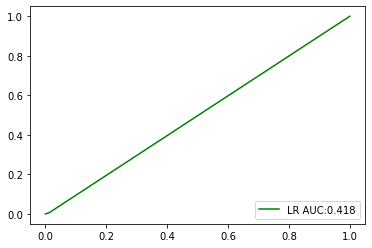

In [60]:
#plotting the ROC curve
auc = roc_auc_score(y_pred4, y_test4)
fpr, tpr, thresholds = roc_curve(y_test4, y_pred4)

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)
plt.legend(loc=4)

plt.show()

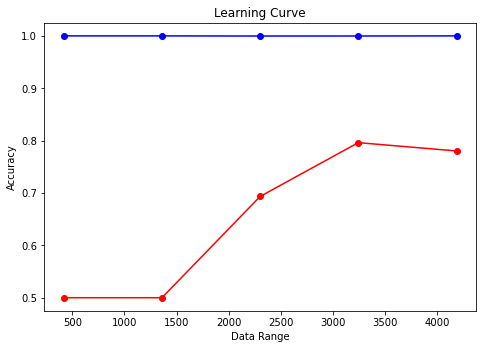

In [61]:
#learning curve of the RF
LearningCurve(rf2, X_train_miss, y_train_miss)

In [62]:
mse, bias, var = bias_variance_decomp\
(rf2, x_train4, y_train4, x_test4, y_test4, loss='mse', num_rounds=20, random_seed=42)

In [63]:
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.290
Bias: 0.219
Variance: 0.070


<BarContainer object of 3 artists>

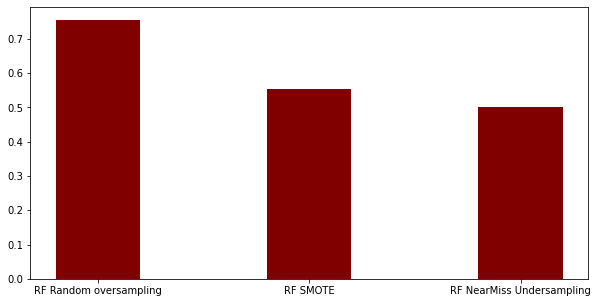

In [64]:
#visualization of the accuracies of the RF models in the 3 methods after the handling the data imbalance 
data = {'RF Random oversampling':0.7551, 'RF SMOTE': 0.5548, 'RF NearMiss Undersampling':0.5003}
names = list(data.keys())
acc = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, acc, color ='maroon',
        width = 0.4)